<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Count_Misssing%20value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [ ]:
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


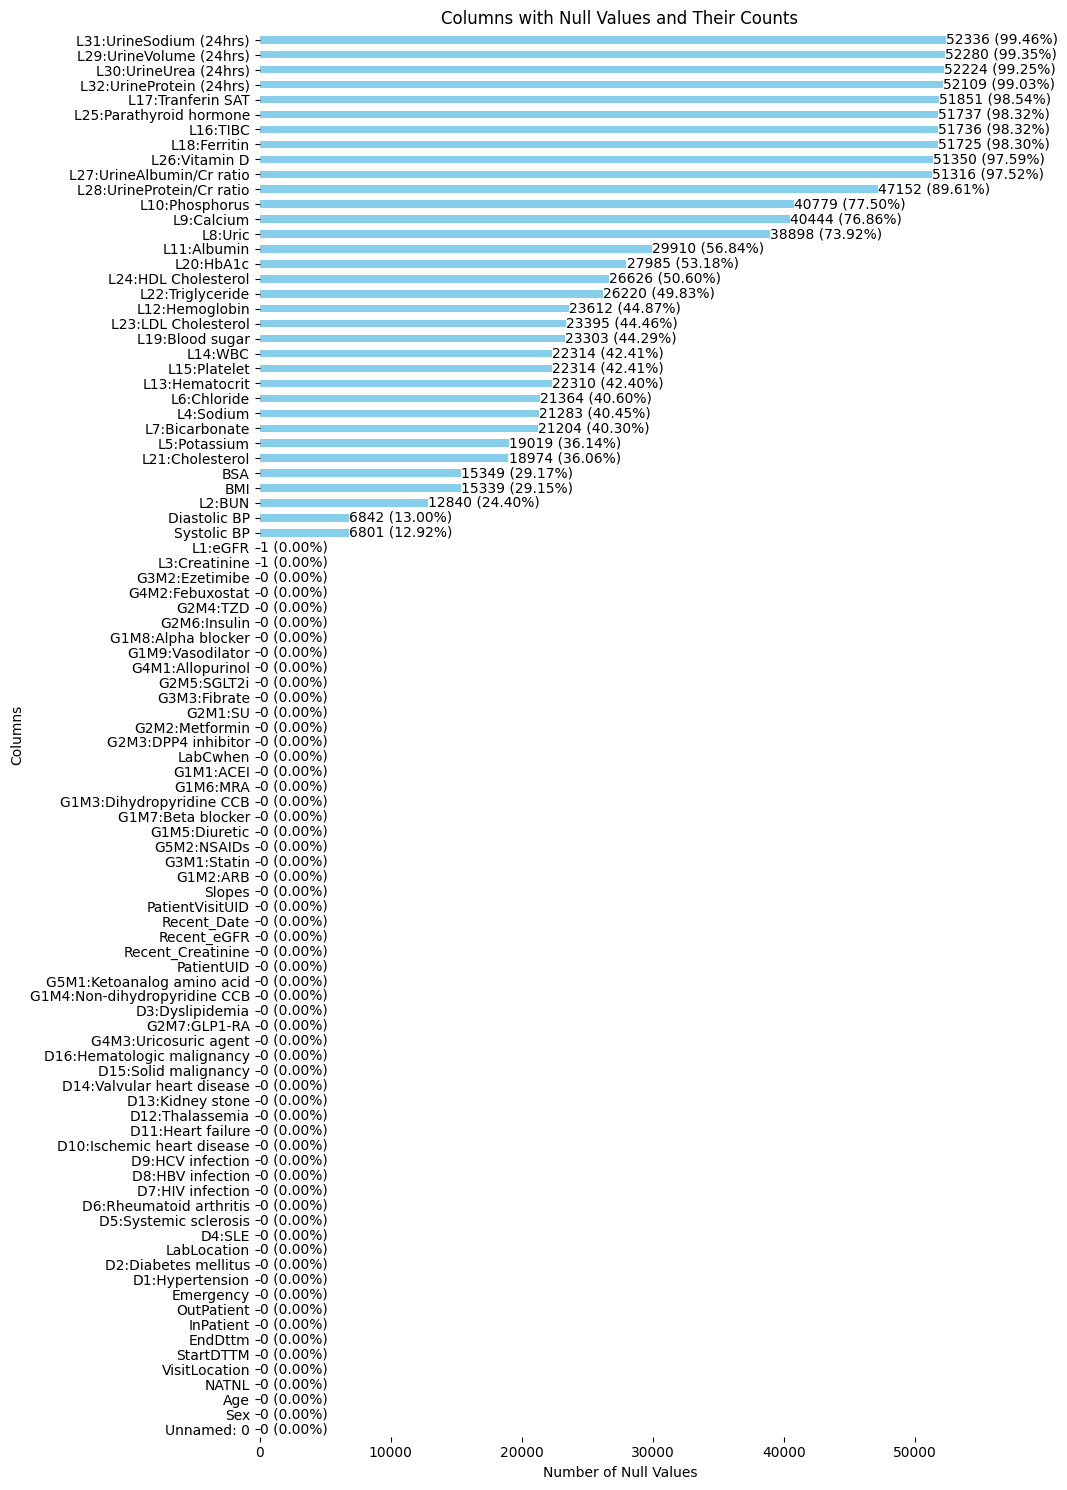

In [4]:
null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()

total_records = len(df)
null_percentage = (null_count_sorted / total_records) * 100

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, f"{v} ({null_percentage.iloc[i]:.2f}%)", color='black', va='center')

plt.show()

In [5]:
df.shape

(52620, 94)

In [45]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR" เป็นคอลัมน์ที่ไม่มี Missing
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
stage = df[missing_columns]
stage.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


##แบ่งระยะโรคไตตามค่า eGFR 5 ระยะ
* ระยะที่ 1 มีค่า > 90 ขึ้นไป
* ระยะที่ 2  มีค่าอยู่ระหว่าง 89-60
* ระยะที่ 3  มีค่าอยุ๋ระหว่าง 59-30
* ระยะที่ 4 มีค่าอยู่ระหว่าง 29-15
* ระยะที่ 5 มีค่า <15



In [46]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'Stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'Stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'Stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'Stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'Stage 4'
    else:
        return 'Stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)
stage.head()

<ipython-input-46-d27e3363694d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 4
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3b
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3a
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3a
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,Stage 3b


In [47]:
stage.columns

Index(['PatientUID', 'Recent_eGFR', 'Slopes', 'BMI', 'BSA', 'Diastolic BP',
       'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium',
       'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)', 'eGFR_Category'],
      dtype='object')

In [50]:
#เรียงให้คอลัมน์  'PatientUID', 'Slopes','Recent_eGFR','eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category'] + [col for col in stage.columns if col not in ['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
data1 = stage[column_order]
data1

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,15.80,Stage 4,NaN,NaN,53.0,131.0,13.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,32.30,Stage 3b,18.71,1.70,71.0,121.0,80.30,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,55.90,Stage 3a,23.56,1.47,93.0,143.0,44.70,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,51.10,Stage 3a,27.50,1.41,60.0,120.0,33.50,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,32.60,Stage 3b,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,43763,-4.929870,55.28,Stage 3a,NaN,NaN,NaN,NaN,73.30,25.0,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,43763,16.017287,55.28,Stage 3a,35.26,2.03,66.0,147.0,68.10,24.8,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,43763,-24.861814,55.28,Stage 3a,NaN,NaN,NaN,NaN,84.60,17.8,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,43763,4.558175,55.28,Stage 3a,NaN,NaN,NaN,NaN,56.06,23.8,...,112.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
import pandas as pd

# นับจำนวนข้อมูลแต่ละระดับของ 'eGFR_Category'
eGFR_count = stage['eGFR_Category'].value_counts()

# สร้าง DataFrame จาก Series ของ eGFR_count
df_eGFR_count = pd.DataFrame({'Count': eGFR_count})

# เพิ่มคอลัมน์ 'eGFR_Category' จาก index
df_eGFR_count['eGFR_Category'] = df_eGFR_count.index

# สลับตำแหน่งคอลัมน์ 'eGFR_Category' ขึ้นไปอยู่ที่ตำแหน่งแรกของ DataFrame
df_eGFR_count = df_eGFR_count[['eGFR_Category', 'Count']]

# จัดลำดับ DataFrame ตาม 'eGFR_Category'
df_eGFR_count_sorted = df_eGFR_count.sort_values(by='eGFR_Category').reset_index(drop=True)

# แสดง DataFrame ที่เรียงลำดับตาม 'eGFR_Category' และมี 'eGFR_Category' ขึ้นก่อน
df_eGFR_count_sorted

,eGFR_Category,Count
0,Stage 1,625
1,Stage 2,13889
2,Stage 3a,21227
3,Stage 3b,10088
4,Stage 4,4239
5,Stage 5,2552


##ระยะที่ 1

In [53]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 1'
stage1 = data1[data1['eGFR_Category'] == 'Stage 1']
stage1 # 1759 rows

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
93,1407655,-11.244949,100.30,Stage 1,NaN,NaN,71.0,94.0,126.90,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2304528,72.432222,109.50,Stage 1,NaN,NaN,99.0,145.0,20.20,39.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,1946107,-59.475059,100.50,Stage 1,NaN,NaN,NaN,NaN,97.20,NaN,...,138.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1138015,-14.531616,95.50,Stage 1,0.22,7.25,76.0,115.0,79.80,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,1486805,2.085714,95.90,Stage 1,24.56,1.57,71.0,124.0,55.50,12.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52124,218497,-20.531250,97.68,Stage 1,NaN,NaN,68.0,147.0,83.10,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52125,218497,9.258910,97.68,Stage 1,NaN,NaN,NaN,NaN,62.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52126,218497,-3.510562,97.68,Stage 1,NaN,NaN,67.0,161.0,74.50,15.7,...,91.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52127,218497,13.338929,97.68,Stage 1,NaN,NaN,67.0,146.0,70.22,12.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage1_missing = stage1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage1_missing / len(stage1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing1 = pd.DataFrame({
    'Stage1_Missing Values': stage1_missing,
    'Stage1_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing1

,Stage1_Missing Values,Stage1_Missing Values (%)
PatientUID,0,0.00
Slopes,0,0.00
Recent_eGFR,0,0.00
eGFR_Category,0,0.00
BMI,223,35.68
BSA,224,35.84
Diastolic BP,79,12.64
Systolic BP,79,12.64
L1:eGFR,0,0.00
L2:BUN,135,21.60


In [55]:
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage1_missing_values_only = missing1[missing1['Stage1_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage1_missing_values_only

,Stage1_Missing Values,Stage1_Missing Values (%)
BMI,223,35.68
BSA,224,35.84
Diastolic BP,79,12.64
Systolic BP,79,12.64
L2:BUN,135,21.60
L4:Sodium,220,35.20
L5:Potassium,205,32.80
L6:Chloride,220,35.20
L7:Bicarbonate,219,35.04
L8:Uric,531,84.96


##ระยะที่ 2

In [56]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 2'
stage2 = data1[data1['eGFR_Category'] == 'Stage 2']
stage2 # 19996

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
7,854989,44.179221,76.10,Stage 2,29.20,1.75,77.0,148.0,29.50,35.8,...,59.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2261796,3.920716,68.80,Stage 2,24.89,1.50,59.0,103.0,64.60,15.9,...,63.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1167788,31.427793,74.70,Stage 2,21.83,1.62,58.0,130.0,59.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,622412,4.777487,88.20,Stage 2,22.49,1.75,92.0,160.0,73.10,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2235293,14.901809,63.90,Stage 2,27.34,1.73,83.0,149.0,48.10,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52606,2180110,-9.147643,72.45,Stage 2,NaN,NaN,NaN,NaN,128.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52607,2180110,6.725197,72.45,Stage 2,NaN,NaN,NaN,NaN,118.50,NaN,...,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
52608,2180110,-4.828042,72.45,Stage 2,23.81,1.78,71.0,138.0,125.52,12.5,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
52609,2180110,-14.127763,72.45,Stage 2,NaN,NaN,NaN,NaN,120.52,NaN,...,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN


In [57]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage2_missing = stage2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage2_missing / len(stage2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing2 = pd.DataFrame({
    'Stage2_Missing Values': stage2_missing,
    'Stage2_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing2

,Stage2_Missing Values,Stage2_Missing Values (%)
PatientUID,0,0.00
Slopes,0,0.00
Recent_eGFR,0,0.00
eGFR_Category,0,0.00
BMI,3880,27.94
BSA,3884,27.96
Diastolic BP,1835,13.21
Systolic BP,1822,13.12
L1:eGFR,1,0.01
L2:BUN,3959,28.50


In [58]:
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage2_missing_values_only = missing2[missing2['Stage2_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage2_missing_values_only

,Stage2_Missing Values,Stage2_Missing Values (%)
BMI,3880,27.94
BSA,3884,27.96
Diastolic BP,1835,13.21
Systolic BP,1822,13.12
L1:eGFR,1,0.01
L2:BUN,3959,28.50
L3:Creatinine,1,0.01
L4:Sodium,6416,46.19
L5:Potassium,5749,41.39
L6:Chloride,6430,46.30


##ระยะที่ 3a

In [59]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3a = data1[data1['eGFR_Category'] == 'Stage 3a']
stage3a.shape

(21227, 40)

In [60]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3a_missing = stage3a.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3a_missing / len(stage3a)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3a = pd.DataFrame({
    'Stage3a_Missing Values': stage3a_missing,
    'Stage3a_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage3a_missing_values_only = missing3a[missing3a['Stage3a_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage3a_missing_values_only

,Stage3a_Missing Values,Stage3a_Missing Values (%)
BMI,5759,27.13
BSA,5758,27.13
Diastolic BP,2930,13.80
Systolic BP,2920,13.76
L2:BUN,5622,26.49
L4:Sodium,9589,45.17
L5:Potassium,8537,40.22
L6:Chloride,9631,45.37
L7:Bicarbonate,9567,45.07
L8:Uric,15640,73.68


##ระยะที่ 3b

In [61]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3b = data1[data1['eGFR_Category'] == 'Stage 3b']
stage3b.shape

(10088, 40)

In [62]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3b_missing = stage3b.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3b_missing / len(stage3b)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3b = pd.DataFrame({
    'Stage3b_Missing Values': stage3b_missing,
    'Stage3b_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage3b_missing_values_only = missing3b[missing3b['Stage3b_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage3b_missing_values_only

,Stage3b_Missing Values,Stage3b_Missing Values (%)
BMI,3117,30.90
BSA,3123,30.96
Diastolic BP,1206,11.95
Systolic BP,1197,11.87
L2:BUN,2174,21.55
L4:Sodium,3549,35.18
L5:Potassium,3164,31.36
L6:Chloride,3558,35.27
L7:Bicarbonate,3534,35.03
L8:Uric,7380,73.16


##ระยะที่ 4

In [63]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 4'
stage4 = data1[data1['eGFR_Category'] == 'Stage 4']
stage4.shape

(4239, 40)

In [64]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage4_missing = stage4.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage4_missing / len(stage4)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing4 = pd.DataFrame({
    'Stage4_Missing Values': stage4_missing,
    'Stage4_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage4_missing_values_only = missing4[missing4['Stage4_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage4_missing_values_only

,Stage4_Missing Values,Stage4_Missing Values (%)
BMI,1483,34.98
BSA,1480,34.91
Diastolic BP,495,11.68
Systolic BP,490,11.56
L2:BUN,661,15.59
L4:Sodium,1029,24.27
L5:Potassium,933,22.01
L6:Chloride,1041,24.56
L7:Bicarbonate,1023,24.13
L8:Uric,2964,69.92


#ระยะที่ 5

In [65]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 5'
stage5 = data1[data1['eGFR_Category'] == 'Stage 5']
stage5.shape

(2552, 40)

In [83]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage5_missing = stage5.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage5_missing / len(stage5)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing5 = pd.DataFrame({
    'Stage5_Missing Values': stage5_missing,
    'Stage5_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage5_missing_values_only = missing5[missing5['Stage5_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage5_missing_values_only

,Stage5_Missing Values,Stage5_Missing Values (%)
BMI,877,34.37
BSA,880,34.48
Diastolic BP,297,11.64
Systolic BP,293,11.48
L2:BUN,289,11.32
L4:Sodium,480,18.81
L5:Potassium,431,16.89
L6:Chloride,484,18.97
L7:Bicarbonate,471,18.46
L8:Uric,1762,69.04


#สร้างตารางรวมทุกระยะ

In [67]:
# สร้างตารางที่รวมกันแนวคอลัมน์
combined_missing_values = pd.concat([
    stage1_missing_values_only,
    stage2_missing_values_only,
    stage3a_missing_values_only,
    stage3b_missing_values_only,
    stage4_missing_values_only,
    stage5_missing_values_only
], axis=1)

# แสดงผลลัพธ์ของตารางที่รวมกัน
combined_missing_values

,Stage1_Missing Values,Stage1_Missing Values (%),Stage2_Missing Values,Stage2_Missing Values (%),Stage3a_Missing Values,Stage3a_Missing Values (%),Stage3b_Missing Values,Stage3b_Missing Values (%),Stage4_Missing Values,Stage4_Missing Values (%),Stage5_Missing Values,Stage5_Missing Values (%)
BMI,223.0,35.68,3880,27.94,5759.0,27.13,3117.0,30.90,1483.0,34.98,877.0,34.37
BSA,224.0,35.84,3884,27.96,5758.0,27.13,3123.0,30.96,1480.0,34.91,880.0,34.48
Diastolic BP,79.0,12.64,1835,13.21,2930.0,13.80,1206.0,11.95,495.0,11.68,297.0,11.64
Systolic BP,79.0,12.64,1822,13.12,2920.0,13.76,1197.0,11.87,490.0,11.56,293.0,11.48
L2:BUN,135.0,21.60,3959,28.50,5622.0,26.49,2174.0,21.55,661.0,15.59,289.0,11.32
L4:Sodium,220.0,35.20,6416,46.19,9589.0,45.17,3549.0,35.18,1029.0,24.27,480.0,18.81
L5:Potassium,205.0,32.80,5749,41.39,8537.0,40.22,3164.0,31.36,933.0,22.01,431.0,16.89
L6:Chloride,220.0,35.20,6430,46.30,9631.0,45.37,3558.0,35.27,1041.0,24.56,484.0,18.97
L7:Bicarbonate,219.0,35.04,6390,46.01,9567.0,45.07,3534.0,35.03,1023.0,24.13,471.0,18.46
L8:Uric,531.0,84.96,10621,76.47,15640.0,73.68,7380.0,73.16,2964.0,69.92,1762.0,69.04


#plot ตามค่า eGFR_Category

In [76]:
#จากมากไปน้อย
stage_sort = data1.sort_values(by='Recent_eGFR', ascending=False)
stage_sort.head()

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
51783,553538,0.058871,140.75,Stage 1,18.88,1.20,68.0,108.0,142.68,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51784,553538,-51.636256,140.75,Stage 1,NaN,NaN,67.0,103.0,142.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319,2384626,0.795640,125.93,Stage 1,NaN,NaN,99.0,144.0,108.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,2384626,7.984375,125.93,Stage 1,23.31,1.54,93.0,132.0,100.10,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,2384626,79.441176,125.93,Stage 1,NaN,NaN,86.0,152.0,42.50,42.7,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN


In [90]:
# นับค่าว่างและค่าไม่ว่างของแต่ละคอลัมน์
missing_values = stage_sort.isnull().sum()
non_missing_values = stage_sort.notnull().sum()

# สร้าง DataFrame ของค่าว่างและค่าไม่ว่าง
missing_non_missing_df = pd.DataFrame({'Missing Values': missing_values, 'Non-Missing Values': non_missing_values})
missing_non_missing_df

,Missing Values,Non-Missing Values
PatientUID,0,52620
Slopes,0,52620
Recent_eGFR,0,52620
eGFR_Category,0,52620
BMI,15339,37281
BSA,15349,37271
Diastolic BP,6842,45778
Systolic BP,6801,45819
L1:eGFR,1,52619
L2:BUN,12840,39780


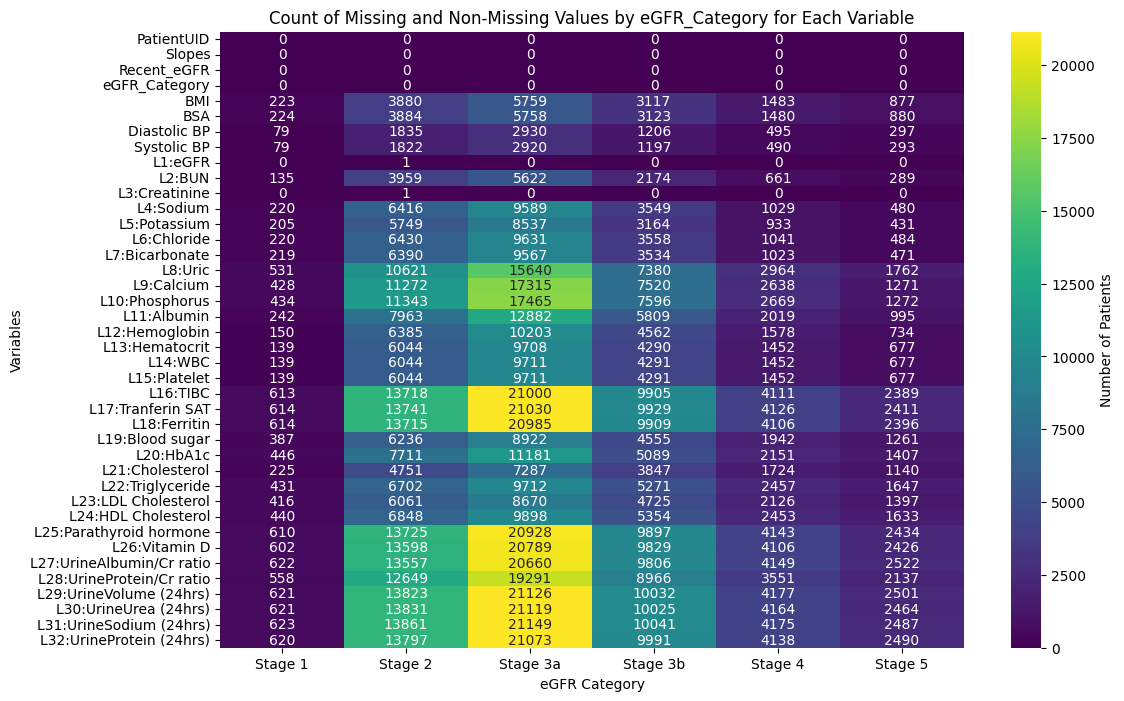

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Count missing and non-missing values for each column by 'eGFR_Category'
missing_non_missing_count = stage_sort.groupby('eGFR_Category').apply(lambda x: x.isnull().sum())

# Transpose the DataFrame for better visualization
missing_non_missing_count = missing_non_missing_count.T

# Plotting the missing and non-missing counts
plt.figure(figsize=(12, 8))
sns.heatmap(missing_non_missing_count, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Patients'})

plt.title('Count of Missing and Non-Missing Values by eGFR_Category for Each Variable')
plt.xlabel('eGFR Category')
plt.ylabel('Variables')
plt.show()

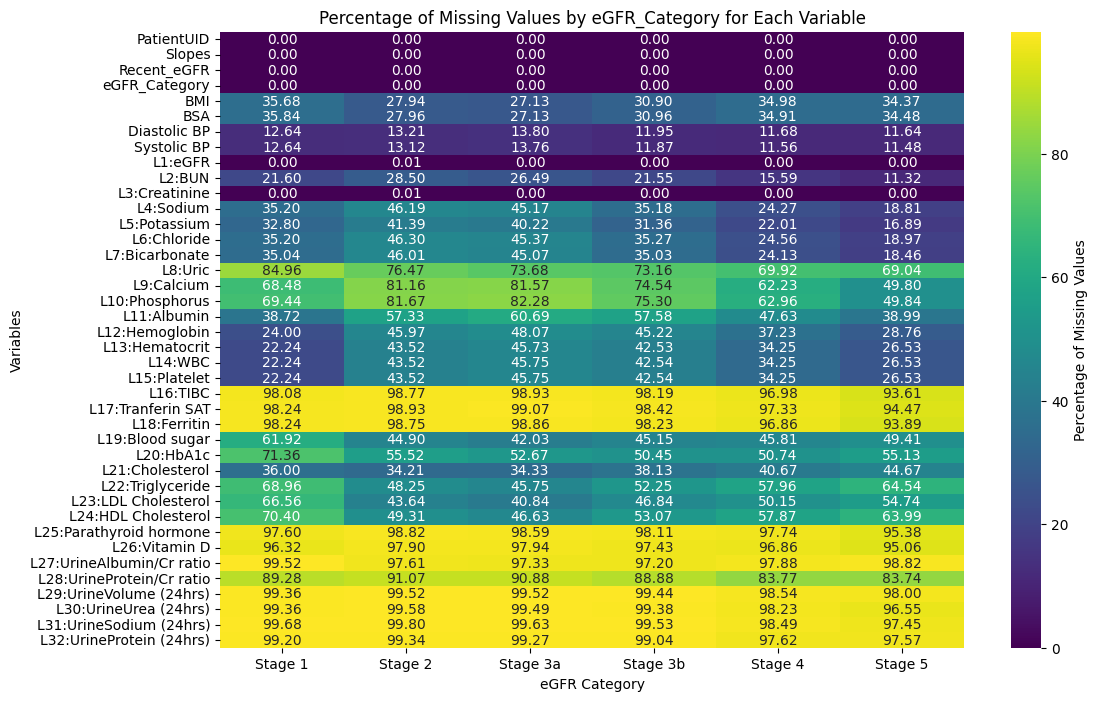

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing and non-missing values for each column by 'eGFR_Category'
missing_non_missing_count = stage_sort.groupby('eGFR_Category').apply(lambda x: x.isnull().mean() * 100)

# Transpose the DataFrame for better visualization
missing_non_missing_count = missing_non_missing_count.T

# Plotting the missing and non-missing counts as percentages
plt.figure(figsize=(12, 8))
sns.heatmap(missing_non_missing_count, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Percentage of Missing Values'})

plt.title('Percentage of Missing Values by eGFR_Category for Each Variable')
plt.xlabel('eGFR Category')
plt.ylabel('Variables')
plt.show()

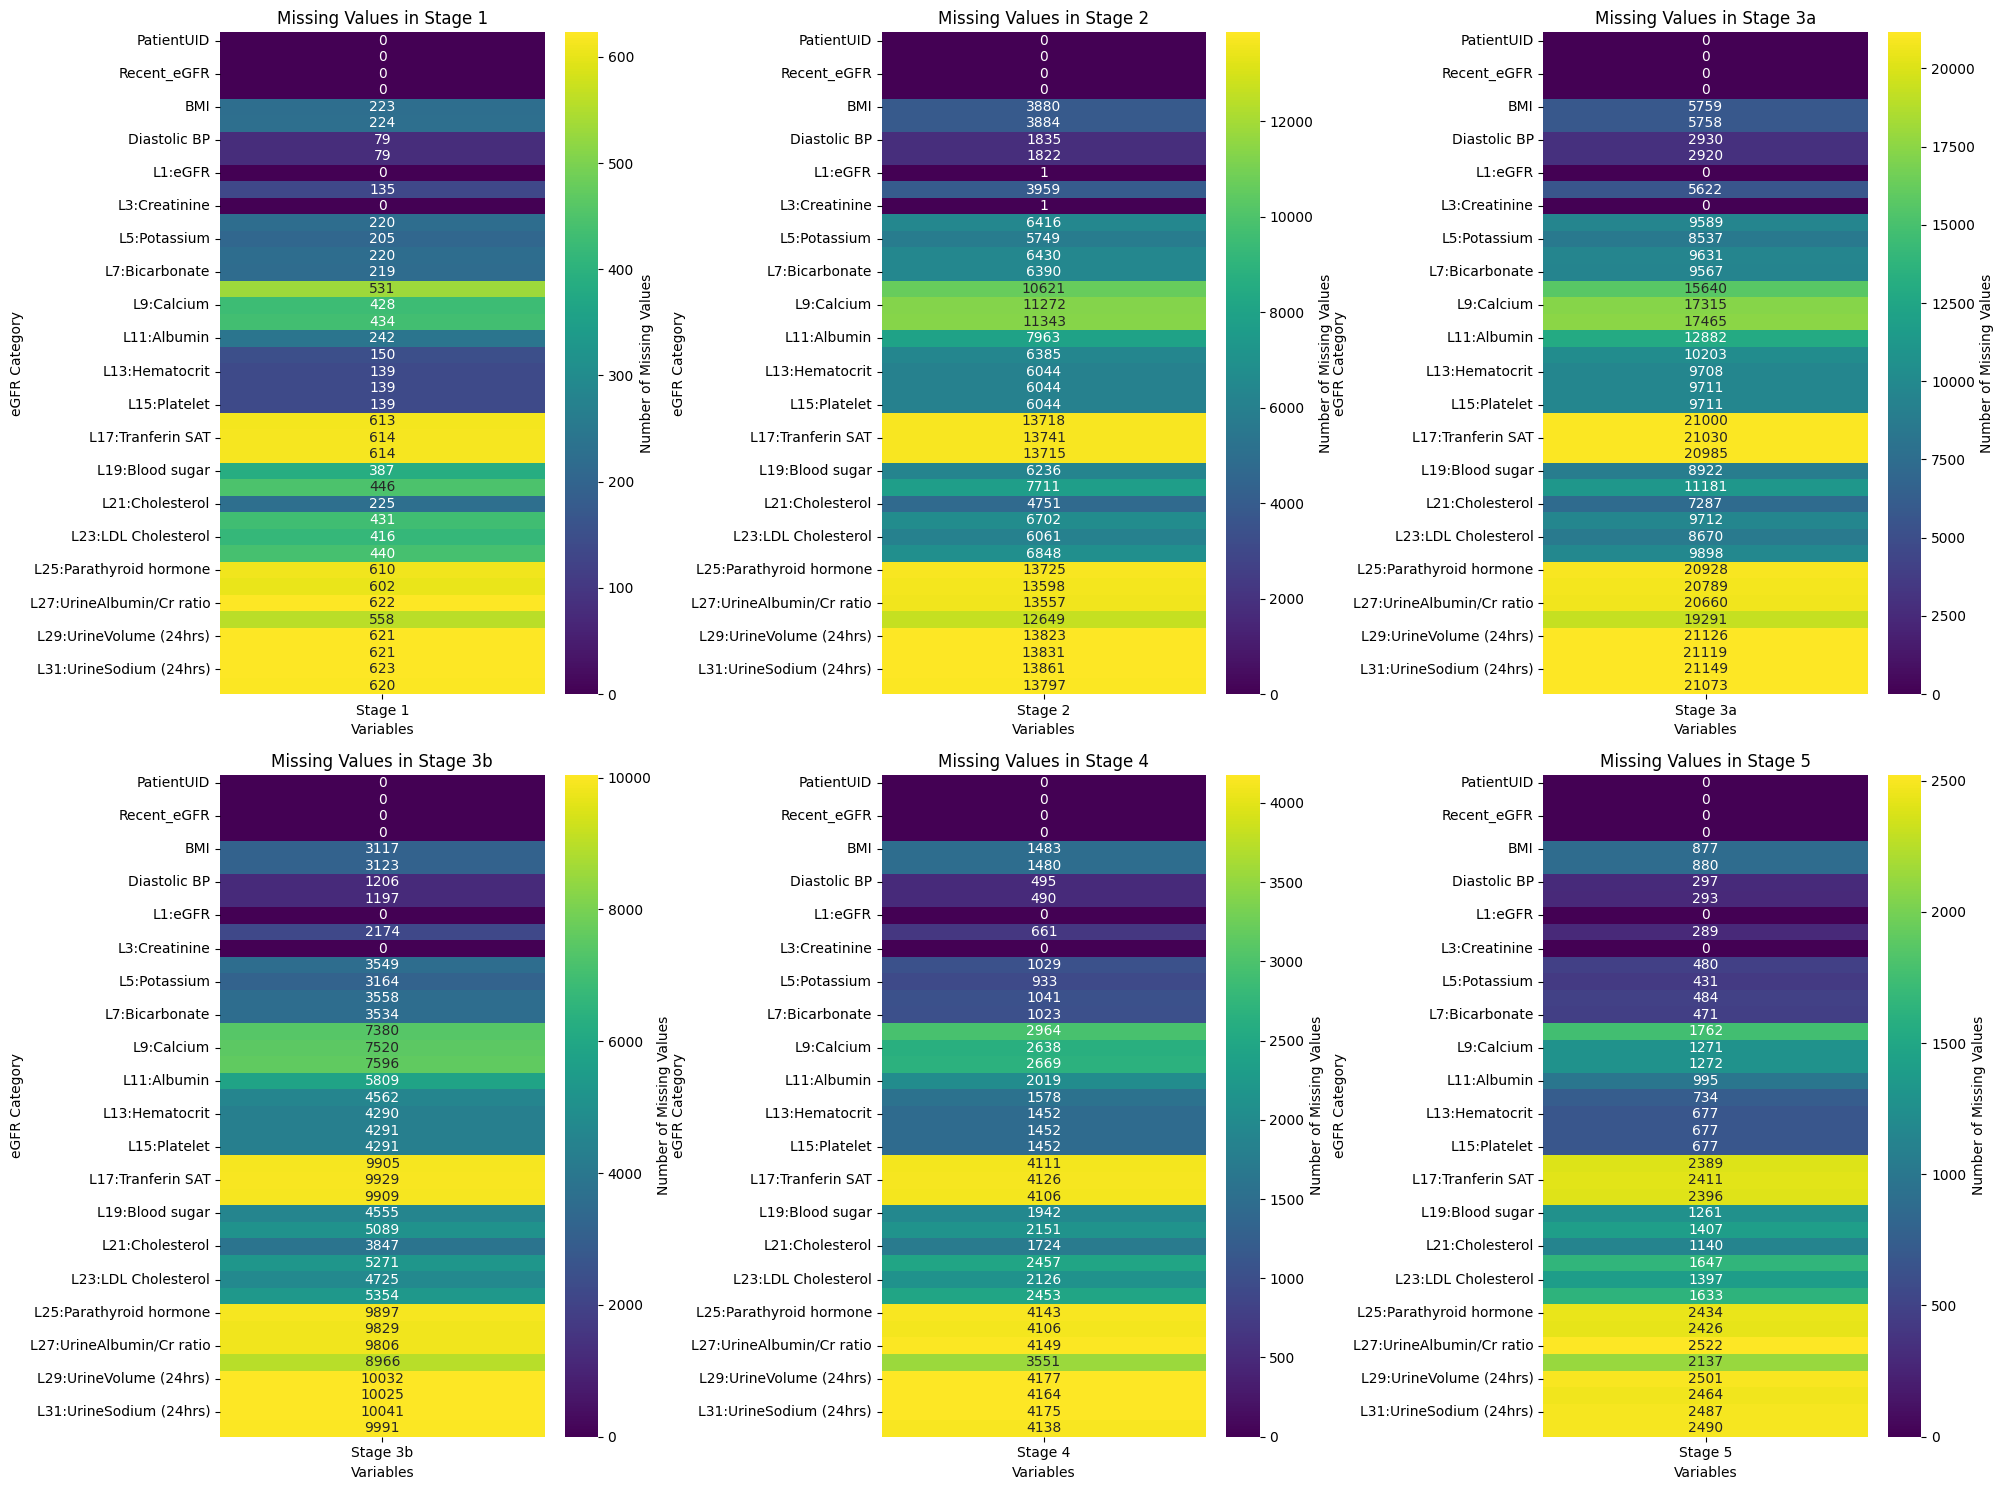

In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing and non-missing values for each column by 'eGFR_Category'
missing_non_missing_count = stage_sort.isnull().groupby(stage_sort['eGFR_Category']).sum()

# Plotting the missing and non-missing counts separately for each eGFR_Category
plt.figure(figsize=(20, 15))

unique_stages = missing_non_missing_count.index.unique()

for i, stage in enumerate(unique_stages):
    plt.subplot(2, len(unique_stages) // 2, i + 1)
    sns.heatmap(missing_non_missing_count.loc[stage].to_frame(), cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Missing Values'})
    plt.title(f'Missing Values in {stage}')
    plt.xlabel('Variables')
    plt.ylabel('eGFR Category')

plt.tight_layout()
plt.show()

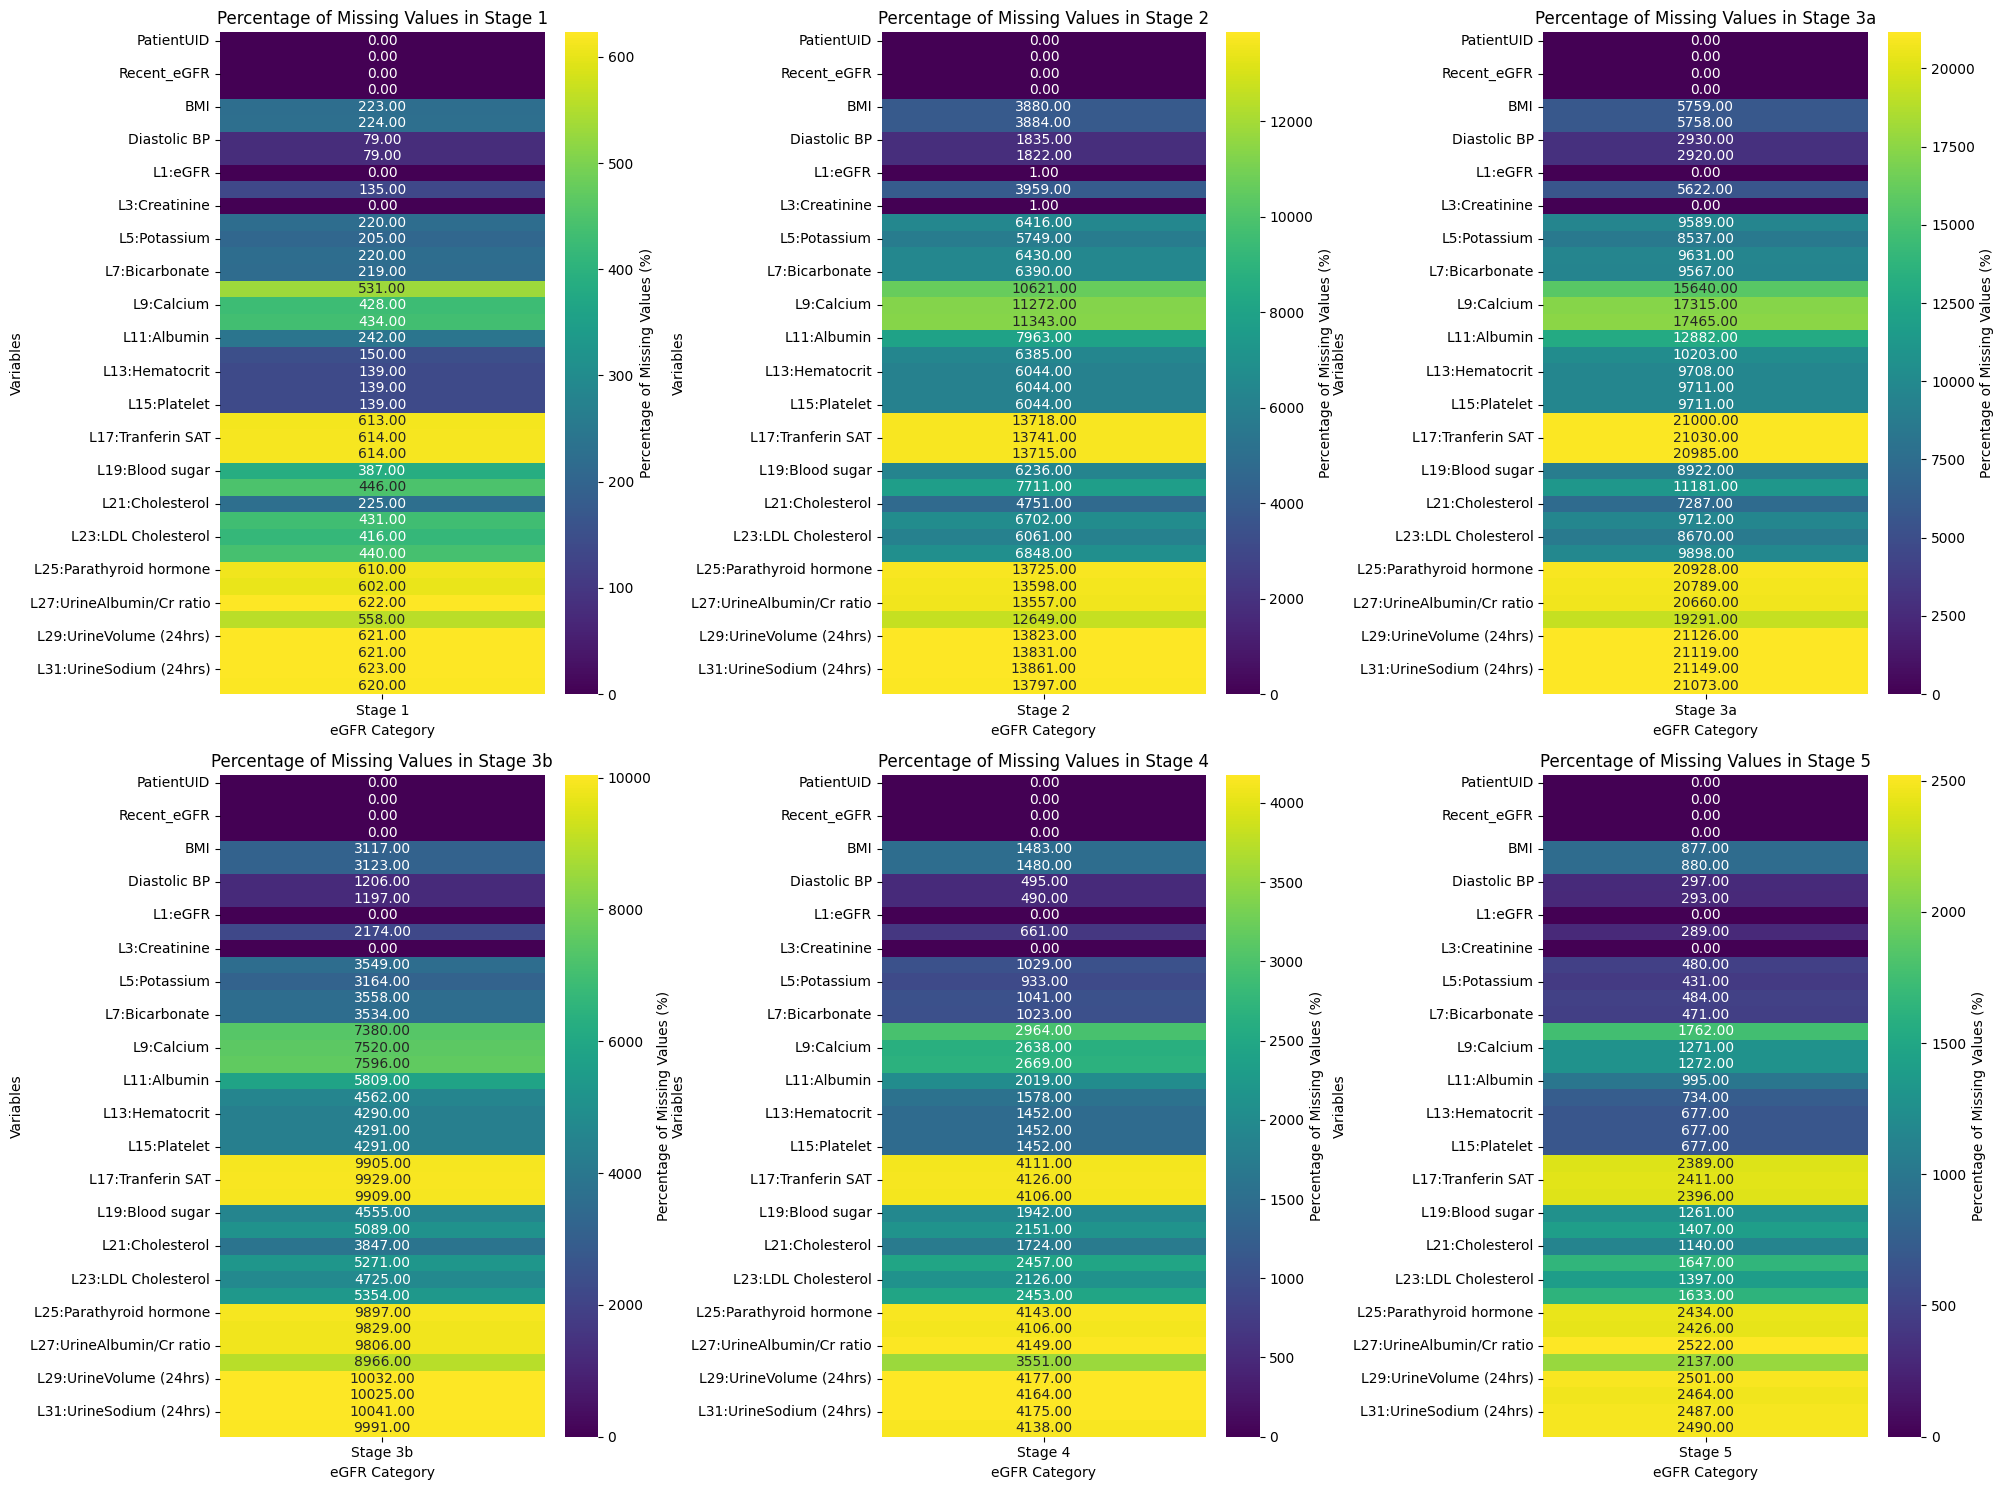

In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Count missing and total values for each column by 'eGFR_Category'
missing_count = stage_sort.isnull().groupby(stage_sort['eGFR_Category']).sum()
total_values = stage_sort.groupby('eGFR_Category').size()

# Transpose the DataFrame for better visualization
missing_non_missing_count = missing_non_missing_count.T

# Plotting the missing percentages separately for each 'eGFR_Category'
plt.figure(figsize=(20, 15))

unique_stages = missing_non_missing_count.index.unique()

for i, stage in enumerate(unique_stages):
    plt.subplot(2, len(unique_stages) // 2, i + 1)
    sns.heatmap(missing_non_missing_count.loc[stage].to_frame(), cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Percentage of Missing Values (%)'})
    plt.title(f'Percentage of Missing Values in {stage}')
    plt.xlabel('eGFR Category')
    plt.ylabel('Variables')

plt.tight_layout()
plt.show()

#แบ่งตามค่า slope

โดยแบ่งออกเป็น
* slope1 คือ >-0.5
* slope2 คือ <=-0.5



In [32]:
df

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.80,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.30,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.90,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.10,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.60,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,1.30,55.28,2566-04-10 15:34:20.643,4553420,-4.929870,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-10-05 08:55:06.223
52616,52616,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,16.017287,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52617,52617,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-24.861814,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52618,52618,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,4.558175,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263


In [33]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
slope = df[missing_columns]
slope.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [34]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'slope1'
    else:
        return 'slope2'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)
slope.head()

<ipython-input-34-d0bea8590f13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),slope_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope2
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,slope2


In [35]:
#เรียงให้คอลัมน์  'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR'] + [col for col in slope.columns if col not in ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR']]
slope = slope[column_order]
slope.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,slope1,15.8,NaN,NaN,53.0,131.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,slope2,32.3,18.71,1.70,71.0,121.0,80.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,slope1,55.9,23.56,1.47,93.0,143.0,44.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,slope1,51.1,27.50,1.41,60.0,120.0,33.5,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,slope2,32.6,NaN,NaN,NaN,NaN,114.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [36]:
# คำนวณเปอร์เซ็นต์ของค่าว่างทั้งหมดแยกตาม 'eGFR_Category'
missing_by_category = slope.groupby('slope_Category').apply(lambda x: round(x.isnull().mean().mean() * 100, 2))
missing_by_category

slope_Category
slope1    51.93
slope2    51.92
dtype: float64

In [37]:
#จากน้อยไปมาก
slope_sort = slope.sort_values(by='Slopes', ascending=True)
slope_sort.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
4,488150,-79.002653,slope2,32.60,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
51584,1139621,-74.927423,slope2,25.44,NaN,NaN,77.0,185.0,95.40,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,515952,-68.120823,slope2,75.50,NaN,NaN,60.0,113.0,125.20,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40820,2136999,-67.941878,slope2,17.01,24.22,1.81,76.0,150.0,101.98,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48577,1582107,-67.405779,slope2,24.08,20.80,1.70,86.0,141.0,77.80,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'slope_Category' เป็น 'slope1	'
slope_1 = slope_sort[slope_sort['slope_Category'] == 'slope1']
slope_1.shape

(22247, 40)

In [39]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope_1_missing = slope_1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope_1_missing / len(slope_1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing_1 = pd.DataFrame({
    'Slope_1_Missing Values': slope_1_missing,
    'Slope_1_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
slope_1_missing_values_only = missing_1[missing_1['Slope_1_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
slope_1_missing_values_only

,Slope_1_Missing Values,Slope_1_Missing Values (%)
BMI,6542,29.41
BSA,6545,29.42
Diastolic BP,3001,13.49
Systolic BP,2980,13.40
L1:eGFR,1,0.00
L2:BUN,5361,24.10
L3:Creatinine,1,0.00
L4:Sodium,8893,39.97
L5:Potassium,7982,35.88
L6:Chloride,8928,40.13


In [40]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'slope_Category' เป็น 'slope1	'
slope_2 = slope_sort[slope_sort['slope_Category'] == 'slope2']
slope_2.shape

(30373, 40)

In [41]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope_2_missing = slope_2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope_2_missing / len(slope_2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing_2 = pd.DataFrame({
    'Slope_2_Missing Values': slope_2_missing,
    'Slope_2_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
slope_2_missing_values_only = missing_2[missing_2['Slope_2_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
slope_2_missing_values_only

,Slope_2_Missing Values,Slope_2_Missing Values (%)
BMI,8797,28.96
BSA,8804,28.99
Diastolic BP,3841,12.65
Systolic BP,3821,12.58
L2:BUN,7479,24.62
L4:Sodium,12390,40.79
L5:Potassium,11037,36.34
L6:Chloride,12436,40.94
L7:Bicarbonate,12355,40.68
L8:Uric,22538,74.20


In [42]:
# สร้างตารางที่รวมกันแนวคอลัมน์
combined_missing_values_slope = pd.concat([
    slope_1_missing_values_only,
    slope_2_missing_values_only
], axis=1)

# แสดงผลลัพธ์ของตารางที่รวมกัน
combined_missing_values_slope

,Slope_1_Missing Values,Slope_1_Missing Values (%),Slope_2_Missing Values,Slope_2_Missing Values (%)
BMI,6542,29.41,8797.0,28.96
BSA,6545,29.42,8804.0,28.99
Diastolic BP,3001,13.49,3841.0,12.65
Systolic BP,2980,13.40,3821.0,12.58
L1:eGFR,1,0.00,NaN,NaN
L2:BUN,5361,24.10,7479.0,24.62
L3:Creatinine,1,0.00,NaN,NaN
L4:Sodium,8893,39.97,12390.0,40.79
L5:Potassium,7982,35.88,11037.0,36.34
L6:Chloride,8928,40.13,12436.0,40.94
